### <font color='orange'> Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo </font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.13


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Carregando os Dados

In [3]:
# Carrega o dataset
df = pd.read_csv('dataset.csv')

In [4]:
# Shape
df.shape

(9700, 11)

In [5]:
# Amostra dos dados
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [6]:
# Amostra dos dados
df.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


### Análise Exploratória

In [7]:
# Colunas do conjunto de dados
df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [8]:
# Verificando o tipo de dado de cada coluna
df.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [9]:
# Resumo estatístico da coluna com o valor de venda
df['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [10]:
# Verificando se há registros duplicados
df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [11]:
# Verificando de há valores ausentes
df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [12]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


### Pergunta de Negócio 1:

Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [13]:
categoria = df[df["Categoria"] == "Office Supplies"]

In [14]:
total_por_cidade = categoria.groupby("Cidade")["Valor_Venda"].sum()

In [15]:
cidade_maior_venda = total_por_cidade.idxmax()

print("A cidade com maior valor de venda de produtos da categoria 'Office Supplies' é:", cidade_maior_venda)

A cidade com maior valor de venda de produtos da categoria 'Office Supplies' é: New York City


### Pergunta de Negócio 2:

Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [16]:
total_por_data = df.groupby("Data_Pedido")["Valor_Venda"].sum()

In [17]:
total_por_data.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

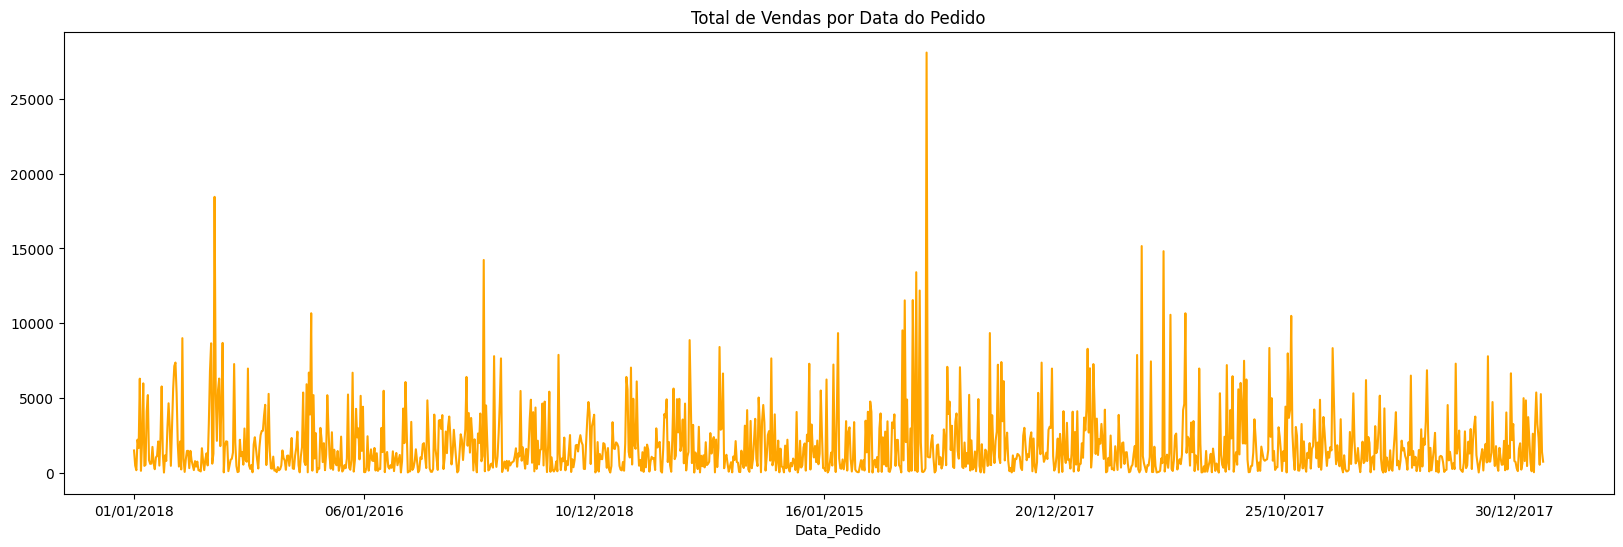

In [18]:
# Plot
plt.figure(figsize=(20,6))
total_por_data.plot(x = "Data_Pedido", y = "Valor_Venda", color="orange")
plt.title("Total de Vendas por Data do Pedido")
plt.show()

### Pergunta de Negócio 3:

Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [19]:
total_por_estado = df.groupby("Estado")["Valor_Venda"].sum().reset_index()

/tmp/ipykernel_55566/3787284914.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = total_por_estado,


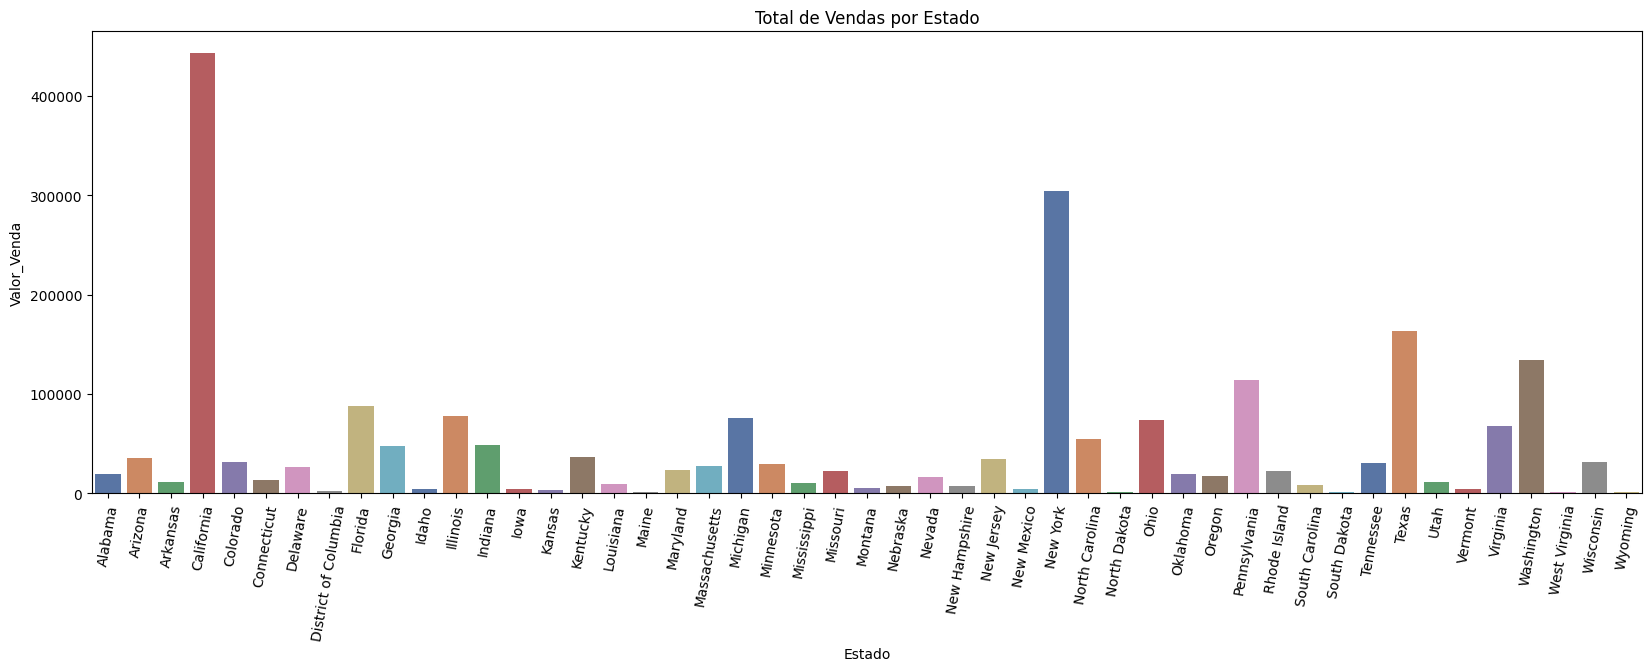

In [20]:
# Plot
plt.figure(figsize=(20,6))
sns.barplot(data = total_por_estado, 
            x = "Estado", 
            y = "Valor_Venda",
            palette="deep").set(title = "Total de Vendas por Estado")
plt.xticks(rotation = 80)
plt.show()

### Pergunta de Negócio 4:

Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [21]:
dez_cidades = df.groupby("Cidade")["Valor_Venda"].sum().reset_index().sort_values(by = "Valor_Venda",
                                                                                              ascending = False).head(10)

In [22]:
dez_cidades

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


/tmp/ipykernel_55566/3180843652.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = dez_cidades,


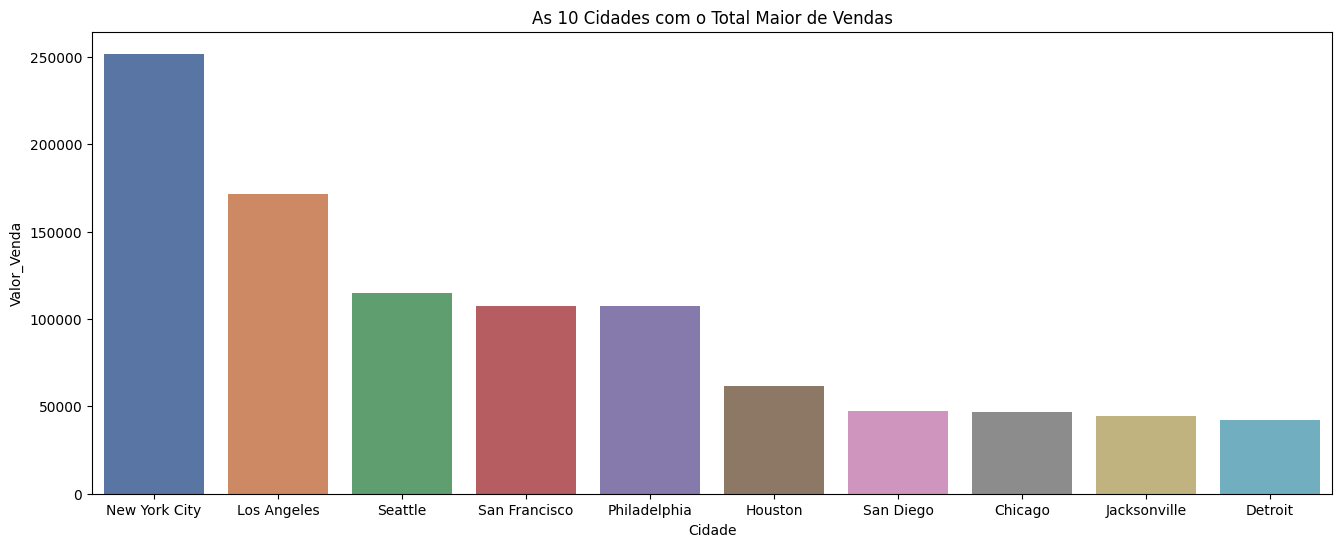

In [23]:
plt.figure(figsize=(16, 6))
sns.set_palette("Set2")
sns.barplot(data = dez_cidades, 
            x = "Cidade", 
            y = "Valor_Venda",
            palette="deep").set(title = "As 10 Cidades com o Total Maior de Vendas")
plt.show()

### Pergunta de Negócio 5:

Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [24]:
segmento_maior = df.groupby("Segmento")["Valor_Venda"].sum().reset_index().sort_values(by = "Valor_Venda",
                                                                                        ascending = False)

In [25]:
segmento_maior.head()

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [26]:
# Função para converter os dados em valor absoluto
def formatar_saida(values):
    def formato(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return "$ {v:d}".format(v = val)
    return formato

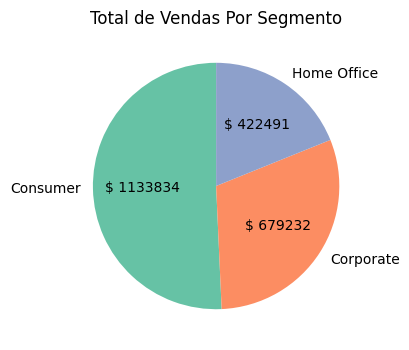

In [27]:
plt.figure(figsize=(10, 4))

plt.pie(segmento_maior["Valor_Venda"], 
       labels=segmento_maior["Segmento"],
       autopct = formatar_saida(segmento_maior["Valor_Venda"]),
       startangle = 90)

plt.title("Total de Vendas Por Segmento")
plt.show()

### Pergunta de Negócio 6:

Qual o Total de Vendas Por Segmento e Por Ano?

In [28]:
df["Data_Pedido"] = pd.to_datetime(df["Data_Pedido"], dayfirst = True)

In [29]:
df.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [30]:
# Cria uma nova coluna
df["Ano"] = df["Data_Pedido"].dt.year

In [31]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [32]:
total_segmento_ano = df.groupby(["Segmento", "Ano"])["Valor_Venda"].sum()

In [33]:
total_segmento_ano

Segmento     Ano 
Consumer     2015    256719.9166
             2016    265295.2593
             2017    288459.5572
             2018    323359.6019
Corporate    2015    125819.5957
             2016    114643.1229
             2017    203266.7398
             2018    235502.7284
Home Office  2015     88229.0878
             2016     74134.1332
             2017    103639.6270
             2018    156488.5849
Name: Valor_Venda, dtype: float64

### Pergunta de Negócio 7:

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

Quantas Vendas Receberiam 15% de Desconto?

In [34]:
# Cria uma nova coluna de acordo com a regra definida acima
df["Desconto"] = np.where(df["Valor_Venda"] > 1000, 0.15, 0.10)

In [35]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1


In [36]:
# Total por cada valor
df["Desconto"].value_counts()

Desconto
0.10    9243
0.15     457
Name: count, dtype: int64

In [37]:
print("457 vendas receberiam desconto de 15%")

457 vendas receberiam desconto de 15%


### Pergunta de Negócio 8:

Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [38]:
df["Valor_Venda_Desconto"] = df["Valor_Venda"] - (df["Valor_Venda"] * df["Desconto"])

In [39]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120


In [40]:
venda_antes_desconto = df.loc[df["Desconto"] == 0.15, "Valor_Venda"]

In [41]:
venda_depois_desconto = df.loc[df["Desconto"] == 0.15, "Valor_Venda_Desconto"]

In [42]:
print("Média do valor antes do desconto de 15%:", round(venda_antes_desconto.mean(), 2))
print("Média do valor depois do desconto de 15%:", round(venda_depois_desconto.mean(), 2))

Média do valor antes do desconto de 15%: 2116.81
Média do valor depois do desconto de 15%: 1799.29


### Pergunta de Negócio 9:

Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [43]:
df["Mês"] = df["Data_Pedido"].dt.month

In [44]:
df_venda_ano_mes_segmento = df.groupby(["Ano", "Mês", "Segmento"])["Valor_Venda"].agg([np.sum, np.mean, np.median])

/tmp/ipykernel_55566/2557756229.py:1: FutureWarning: The provided callable <function sum at 0x7f6680138ca0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_venda_ano_mes_segmento = df.groupby(["Ano", "Mês", "Segmento"])["Valor_Venda"].agg([np.sum, np.mean, np.median])
/tmp/ipykernel_55566/2557756229.py:1: FutureWarning: The provided callable <function mean at 0x7f6680139bd0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_venda_ano_mes_segmento = df.groupby(["Ano", "Mês", "Segmento"])["Valor_Venda"].agg([np.sum, np.mean, np.median])
/tmp/ipykernel_55566/2557756229.py:1: FutureWarning: The provided callable <function median at 0x7f66601dc5e0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable 

In [45]:
df_venda_ano_mes_segmento

sum        mean  median
Ano  Mês Segmento                                   
2015 1   Consumer      6896.6290  146.736787  36.440
         Corporate     1701.5280  130.886769  51.940
         Home Office   5607.5500  329.855882  62.820
     2   Consumer      3167.8540  117.327926  22.776
         Corporate      623.1180   69.235333  62.310
...                          ...         ...     ...
2018 11  Corporate    44357.9862  341.215278  79.530
         Home Office  24009.3840  247.519423  56.560
     12  Consumer     48107.4558  183.616244  52.533
         Corporate    20524.4320  153.167403  46.460
         Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

In [46]:
# Extrair os níveis
anos = df_venda_ano_mes_segmento.index.get_level_values(0)
meses = df_venda_ano_mes_segmento.index.get_level_values(1)
segmentos = df_venda_ano_mes_segmento.index.get_level_values(2)

<Figure size 1200x600 with 0 Axes>

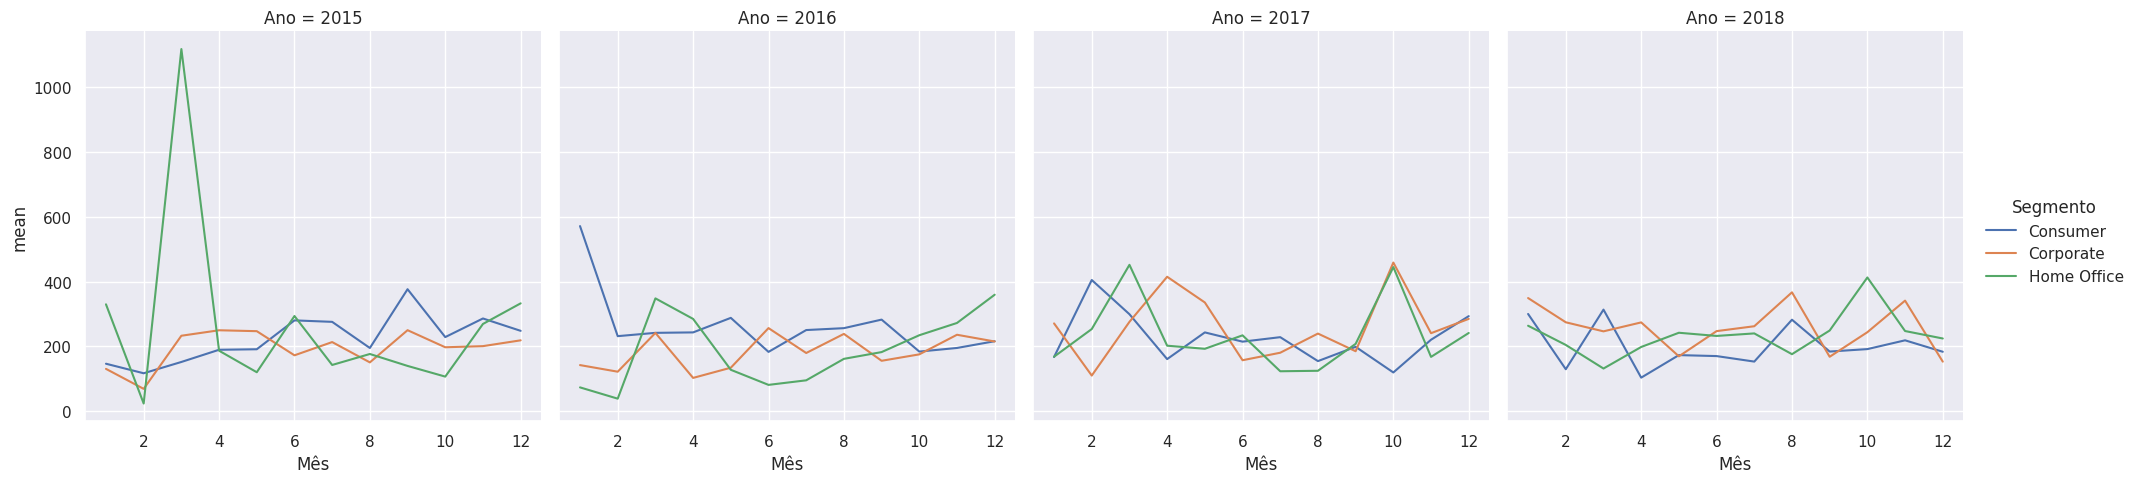

In [47]:
plt.figure(figsize=(12, 6))

sns.set()
fig1 = sns.relplot(kind="line",
                   data=df_venda_ano_mes_segmento, 
                   y="mean",
                   x=meses, 
                   hue=segmentos,
                   col=anos,
                   col_wrap=4)

plt.show()

### Pergunta de Negócio 10:

Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

In [48]:
total_categoria_subcategoria = df.groupby(["Categoria", "SubCategoria"]).sum(numeric_only=True).sort_values("Valor_Venda",
                                                                                                            ascending=False).head(12)

In [49]:
total_categoria_subcategoria = total_categoria_subcategoria[["Valor_Venda"]].astype(int).sort_values(by="Categoria").reset_index()

In [50]:
total_categoria_subcategoria

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [51]:
total_categoria_subcategoria = total_categoria_subcategoria.groupby("Categoria").sum(numeric_only=True).reset_index()

In [52]:
total_categoria_subcategoria

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


### Fim